# <center>COMP0164 Digital Finance Group Project</center>

## <center>Group K</center>

## Requirements

- For each question where a **numerical answer** is required, you should show the **python code** that you used to compute the answer and the **relevant formulas and working steps** to solve the problem.


- For any **mini-essay question**, you should write your answers in **markdown and in full sentences** (not bullet points).

In [1]:
import seaborn
import numpy as np
import pandas as pd
import yfinance as yf
import numpy_financial as npf
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
from numpy import log, exp, sqrt 
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Question 1

### a) Calculate the weighted average cost of capital of Tim-jams prior to its new project investment.

The weighted average cost of captical can be calculated as: 

\begin{equation}
\begin{split}
WACC &= w_d \times r_d \times (1 - t) + w_e \times r_e\\
&= \frac{D}{D+E}\times r_d \times (1 - t) + \frac{E}{D+E} \times (r_f + β_e\times r_{p})\\
\end{split}
\end{equation}

where $D$ is the deft, $E$ is the equity, $r_d$ is the cost of debt, $t$ is the tax rate, $r_f$ is the risk-free rate, $\beta_e$ is the equity beta and $r_{p}$ is the equity risk premium.

Therefore, we have:

\begin{equation}
\begin{split}
WACC &= \frac{0.9}{0.9+2.4} \times 9.25\% \times (1 - 37.5\%)+ \frac{2.4}{0.9+2.4} \times(4.25\% + 1.3 \times 4.82\%)\\
&= 9.2247\%
\end{split}
\end{equation}

In [2]:
def WACC(D, E, r_d, t, r_f, beta, r_p):
    w_d = D / (D+E)
    w_e = E / (D+E)
    r_e = r_f + beta * r_p
    return w_d * r_d * (1-t) + w_e * r_e

wacc = WACC(0.9, 2.4, 0.0925, 0.375, 0.0425, 1.3, 0.0482)
print('The weighted average cost of capital is: ', '{0:.4%}'.format(wacc))

The weighted average cost of capital is:  9.2247%


### b) Find Tim-jams’ asset beta prior to the new project.

The asset beta prior to the new project is given as:

\begin{equation}
\begin{split}
\beta_{asset} &= \beta_{e}\times\frac{1}{[1+(1-t)\times\frac{D}{E}]}
\end{split}
\end{equation}

where $\beta_e$ is the equity beta, $t$ is the tax rate, $D$ is the debt and $E$ is the equity.

Therefore, we have:

\begin{equation}
\begin{split}
\beta_{asset} &= 1.3\times\frac{1}{[1+(1-37.5\%)\times\frac{0.9}{2.4}]}\\
&= 1.0532\\
\end{split}
\end{equation}

In [3]:
def beta_asset(beta_e, t, D, E):
    return beta_e / (1 + (1-t)*D/E)

beta_a = beta_asset(1.3, 0.375, 0.9, 2.4)
print('The asset beta prior to the new project is: ', '{0:.4f}'.format(beta_a))

The asset beta prior to the new project is:  1.0532


### c) If the new project has the same asset beta as the Tim-jams’ in b), find the project equity beta.

The project equity beta $\beta_{pe}$ can be calculated from:

\begin{equation}
\begin{split}
\beta_{asset} &= \beta_{pe}\times\frac{1}{[1+(1-t)\times\frac{D_p}{E_p}]}
\end{split}
\end{equation}

where $\beta_{asset}$ is the asset beta, $t$ is the tax rate, $D_p$ is the projhect debt and $E_p$ is the project equity.

Therefore, we have:

\begin{equation}
\begin{split}
1.0532 &= \beta_{pe}\times\frac{1}{[1+(1-37.5\%)\times\frac{80}{20}]}\\
\beta_{pe} &= 1.0532\times[1+(1-37.5\%)\times\frac{80}{20}]\\
&= 3.6861\\
\end{split}
\end{equation}

In [4]:
def beta_project(beta_a, t, D_p, E_p):
    return beta_a * (1+(1-t)*D_p/E_p)

beta_pe = beta_project(beta_a, 0.375, 80, 20)
print('The project equity beta is: ', '{0:.4f}'.format(beta_pe))

The project equity beta is:  3.6861


### d) Use python functions to automatically calculate project FCFs and prove that the afte rtax free cash flow generated for the next three years are \\$48 million, \\$52 million, and \\$54.4 million, respectively.

In [9]:
def compute_FCF(R, OC, D, t):
    '''
    R: revenue
    OC: operating cost
    D: depreciation
    t: tax rate
    '''
    return (R-OC-D) * (1-t) + D

print("The FCFs generated for the next three years are: ", compute_FCF(99.2,32,16,0.375), 
     'and', compute_FCF(109.6,36,16,0.375), 'and', compute_FCF(115.44,38,16,0.375))

The FCFs generated for the next three years are:  48.0 and 52.0 and 54.4


### e) Find the project NPV and IRR with the next three years after-tax free cash flow given in d).

We first compute the WACC of the project:

\begin{equation}
\begin{split}
WACC_p & = \frac{D_{p}}{D_{p}+E_{p}}\times r_d \times (1 - t) + \frac{E_{p}}{D_{p}+E_{p}} \times r_{pe}\\
& = \frac{D_{p}}{D_{p}+E_{p}}\times r_d \times (1 - t) + \frac{E_{p}}{D_{p}+E_{p}} \times (r_f + \beta_{pe}\times r_{premium})\\
& = \frac{80}{100}\times 9.25\% \times (1 - 37.5\%) + \frac{20}{100} \times (4.25\% + 3.6861 \times 4.82\%)\\\
& = 9.03\%
\end{split}
\end{equation}

We then have the project NPV:

\begin{equation}
\begin{split}
NPV & = CF_0 + \frac{CF_1}{1+WACC_p}+ \frac{CF_2}{(1+WACC_p)^2}+ \frac{CF_3}{(1+WACC_p)^3}\\
& = -100 + \frac{48}{1+9.0284\%}+ \frac{52}{(1+9.0284\%)^2}+ \frac{54.4}{(1+9.0284\%)^3}\\
& = 29.74\\
\end{split}
\end{equation}

and the project IRR which makes the NPV zero:

\begin{equation}
\begin{split}
0 & = CF_0 + \frac{CF_1}{1+IRR}+ \frac{CF_2}{(1+IRR)^2}+ \frac{CF_3}{(1+IRR)^3}\\
0 & = -100 + \frac{48}{1+IRR}+ \frac{52}{(1+IRR)^2}+ \frac{54.4}{(1+IRR)^3}\\
IRR & = 24.69\%\\
\end{split}
\end{equation}

In [10]:
def compute_npv(CF, r):
    npv = CF[0]
    for i in range(1,len(CF)):
        npv += CF[i] / (1+r)**i
    return npv

def compute_irr(CF):
    r = symbols('r')
    f = CF[0]
    for i in range(1,len(CF)):
        f += CF[i] / (1+r)**i
    irr = float(solve(f, r)[0])
    return irr

wacc_n = WACC(80, 20, 0.0925, 0.375, 0.0425, beta_pe, 0.0482)
print("The WACC of the project is: ",'{0:.2%}'.format(wacc_n))

cf0, cf1, cf2, cf3 = -100, compute_FCF(99.2,32,16,0.375), compute_FCF(109.6,36,16,0.375), compute_FCF(115.44,38,16,0.375)
CF = [cf0, cf1, cf2, cf3]
#NPV = npf.npv(wacc_n, [cf0, cf1, cf2, cf3])
#IRR = npf.irr([cf0, cf1, cf2, cf3])
NPV = compute_npv(CF, wacc_n)
IRR = compute_irr(CF)
print('The NPV of the project is: ', '{0:.2f}'.format(NPV))
print('The IRR of the project is: ', '{0:.2%}'.format(IRR))

The WACC of the project is:  9.03%
The NPV of the project is:  29.74
The IRR of the project is:  24.69%


### f) Use the discount dividend method and find the current value of Anvilson’s stock under both economic conditions.

When the economy is booming, the current value is calculated as:

\begin{equation}
\begin{split}
D_5 & = D_0 \times (1+g_1)^4 \times (1+g_2)\\
& = 0.65 \times 1.12^4 \times 1.035\\
& = 1.0586\\\\
P_4 & = \frac{D_5}{r-g_2}\\
& = \frac{1.0586}{7.35\%-3.5\%}\\
& = 27.496\\\\
P_0 & = \frac{D_1}{1+r}+\frac{D_2}{(1+r)^2}+\frac{D_3}{(1+r)^3}+\frac{D_4+P_4}{(1+r)^4}\\
&=\frac{D_0(1+g_1)}{1+r}+\frac{D_0(1+g_1)^2}{(1+r)^2}+\frac{D_0(1+g_1)^3}{(1+r)^3}+\frac{D_0(1+g_1)^4+P_4}{(1+r)^4}\\
& =  \frac{0.65 \times 1.12}{1.0735}+\frac{0.65 \times 1.12^2}{1.0735^2}+\frac{0.65 \times 1.12^3}{1.0735^3}+\frac{0.65 \times 1.12^4+27.496}{1.0735^4}\\
& = 23.60
\end{split}
\end{equation}

When the economy falls into a recession, the current value is calculated as:

\begin{equation}
\begin{split}
P_0 & = \frac{D_0 \times (1+g_2)}{r-g_2}\\
& = \frac{0.65 \times (1+3.5\%)}{7.35\%-3.5\%}\\
& = 17.47
\end{split}
\end{equation}

In [11]:
D0 = 0.65
g1 = 0.12
g2 = 0.035
r = 0.0735

D1 = D0 * (1+g1)
D2 = D0 * (1+g1)**2
D3 = D0 * (1+g1)**3
D4 = D0 * (1+g1)**4
D5 = D0 * (1+g1)**4 * (1+g2)

P4 = D5 / (r-g2)

P0_booming = compute_npv([0, D1, D2, D3, D4+P4], r)
print('The current value when the economy is booming: ', '{0:0.2f}'.format(P0_booming))

P0_recession = D0 * (1+g2) / (r-g2)
print('The current value when the economy falls into a recession: ', '{0:0.2f}'.format(P0_recession))

The current value when the economy is booming:  23.60
The current value when the economy falls into a recession:  17.47


### g) Calculate Einmobil company’s sustainable growth rate, find the value of the company’s stock at the beginning of 2022 and determine the company’s present value of growth opportunities.

The sustainable growth rate $g$, the stock value $p_{2022}$ and the company's present value of growth opportunities $PVGO$ are calculated as:

\begin{equation}
\begin{split}
g &= ROE \times Retention\;Ratio \\
&= 14\% \times 0.6 \\
&= 8.4\%\\\\
DPS &= Payout\;Ratio\times EPS \\
&= (1- Retention\;Ratio)\times EPS \\
&= 0.4\times 2\\
&= 0.8\\\\
P_{2022} & = \frac{DPS}{r-g}\\
& = \frac{0.8}{11\%-8.4\%}\\
& = 30.77\\\\
PVGO & = P_{2022} - \frac{EPS}{r} \\
& = 30.77-\frac{2}{11\%}\\
& = 12.59
\end{split}
\end{equation}

In [12]:
ROE = 0.14
retention = 0.6
g = ROE * retention
print('The sustainable growth rate is: ', '{0:.1%}'.format(g))

r = 0.11
EPS = 2
DPS = (1-retention) * EPS
P_2022 = DPS / (r-g)
print('The value of the stock a the beginning of 2022 is: ', '{0:.2f}'.format(P_2022))

PVGO = P_2022 - EPS/r
print("The compnay's present value of growth opportunities is: ", '{0:.2f}'.format(PVGO))

The sustainable growth rate is:  8.4%
The value of the stock a the beginning of 2022 is:  30.77
The compnay's present value of growth opportunities is:  12.59


## Question 2

### a) Based on Exhibit 1, find the five-year spot rate.

When we use the par rate as the coupon rate, the present value is equal to the par value, thus we have:

\begin{equation}
\begin{split}
p & = \frac{CF_1}{1+s_1}+ \frac{CF_2}{(1+s_2)^2}+ \frac{CF_3}{(1+s_3)^3}+ \frac{CF_4}{(1+s_4)^4}+ \frac{CF_5}{(1+s_5)^5}\\
p & = \frac{0.0437p}{1+0.025}+ \frac{0.0437p}{(1+0.030)^2}+ \frac{0.0437p}{(1+0.035)^3}+ \frac{0.0437p}{(1+0.040)^4}+ \frac{1.0437p}{(1+s_5)^5}\\
p &= 0.1606p + \frac{1.0437p}{(1+s_5)^5}\\
0.8394p &= \frac{1.0437p}{(1+s_5)^5}\\
(1+s_5)^5 &= 1.2434\\
s &= 4.4530\%\\
\end{split}
\end{equation}

In [13]:
def compute_spot_rate(spot_rate_list, par_rate):
    f = 1
    cf = 1 * par_rate
    for i in range(len(spot_rate_list)):
        f -= cf / (1+spot_rate_list[i])**(i+1)
    print(f)
    f = (1+cf) / f
    print(f)
    s = f**(1/(len(spot_rate_list)+1)) - 1
    return s

par_rate = 0.0437
spot_rate_list = [0.025, 0.030, 0.035, 0.040]
s_5 = compute_spot_rate(spot_rate_list, par_rate)
print('The five-year spot rate is: ', '{0:.4%}'.format(s_5))

0.8394045730436999
1.2433813604511592
The five-year spot rate is:  4.4530%


### b) Use Exhibit 1 and the law of one price to calculate the forward rate of a one-year loan starting in three years.

The law of one price is given as:

$$
(1+4\%)^4=(1+3.5\%)^3\cdot(1+f_{3-4})\\
$$

where $f_{3-4}$ is the forward rate starting in three years. Therefore, we have:

$$
f_{3-4} = 5.5145\%
$$

In [14]:
f_3_4 = (1+0.040)**4 / (1+0.035)**3 - 1
print('The forward rate is: ', '{0:.4%}'.format(f_3_4))

The forward rate is:  5.5145%


### c) Given spot rates for one-, two-, and three-year zero bonds, how many forward rates can be calculated? Please list the forward rates that can be calculated and briefly explain your answer.

There are 3 forwards rates that can be calculated using the law of one price:

$$
(1+s_{b})^b=(1+s_{a})^a\cdot(1+f_{a-b})^{(b-a)}
$$

- given the 1- and 2-year spot rates $s_1$ and $s_2$, we can calculate the 1-year forward rate $f_{1-2}$ starting in one year.
- given the 2- and 3-year spot rates $s_2$ and $s_3$, we can calculate the 1-year forward rate $f_{2-3}$ starting in two years.
- given the 1- and 3-year spot rates $s_1$ and $s_3$, we can calculate the 2-year forward rate $f_{1-3}$ starting in one year.

### d) Find the yield to maturity for Bond A. You should use the IRR formula method in python.

We have:

\begin{equation} 
\begin{split}
PV &= \frac{60}{1.025}+\frac{60}{1.03^2}+\frac{1060}{1.035^3}=1071.1516\\
0 & = -1071.1516 + \frac{60}{1+IRR}+ \frac{60}{(1+IRR)^2}+ \frac{1060}{(1+IRR)^3}\\
\end{split}
\end{equation}

Thus, the yield to maturity for Bond A is:

$$
\text{IRR}=3.46\%
$$

In [15]:
PV = 60/(1+0.025) + 60/(1+0.030)**2 + 1060/(1+0.035)**3
CF = [-PV, 60, 60, 1060]
IRR = npf.irr(CF)
print('The yield to maturity for Bond A is: ', '{0:.2%}'.format(IRR))

The yield to maturity for Bond A is:  3.46%


### e) Based on Exhibit 3, assume an equal probability of interest rate going up and down at each node. Calculate the value of Bond B and Bond C with the binomial tree model.

In [16]:
r0, ru, rd, ruu, rud, rdd = 1.0225, 1.03593, 1.029417, 1.04647, 1.038046, 1.03115

#compute realization 1
P0_1 = 1044/ruu/ru/r0 + 44/ru/r0 + 44/r0
P1_1 = 1044/ruu/ru + 44/ru
P2_1 = 1044/ruu
print("Realization 1 (uu node): P0 =", '{0:.4f}'.format(P0_1),
      ", P1 =", '{0:.4f}'.format(P1_1), 
      ", P2 =", '{0:.4f}'.format(P2_1))

#compute realization 2
P0_2 = 1044/rud/ru/r0 + 44/ru/r0 + 44/r0
P1_2 = 1044/rud/ru + 44/ru
P2_2 = 1044/rud
print("Realization 2 (ud node): P0 =", '{0:.4f}'.format(P0_2),
      ", P1 =", '{0:.4f}'.format(P1_2), 
      ", P2 =", '{0:.4f}'.format(P2_2))

#compute realization 3
P0_3 = 1044/rud/rd/r0 + 44/rd/r0 + 44/r0
P1_3 = 1044/rud/rd + 44/rd
P2_3 = 1044/rud
print("Realization 3 (ud node): P0 =", '{0:.4f}'.format(P0_3),
      ", P1 =", '{0:.4f}'.format(P1_3), 
      ", P2 =", '{0:.4f}'.format(P2_3))

#compute realization 4
P0_4 = 1044/rdd/rd/r0 + 44/rd/r0 + 44/r0
P1_4 = 1044/rdd/rd + 44/rd
P2_4 = 1044/rdd
print("Realization 4 (dd node): P0 =", '{0:.4f}'.format(P0_4),
      ", P1 =", '{0:.4f}'.format(P1_4), 
      ", P2 =", '{0:.4f}'.format(P2_4))

Realization 1 (uu node): P0 = 1026.4173 , P1 = 1005.5117 , P2 = 997.6397
Realization 2 (ud node): P0 = 1034.0606 , P1 = 1013.3269 , P2 = 1005.7358
Realization 3 (ud node): P0 = 1040.3307 , P1 = 1019.7381 , P2 = 1005.7358
Realization 4 (dd node): P0 = 1046.7208 , P1 = 1026.2720 , P2 = 1012.4618


In all four realizations we have $P_{1}>1000$, so Bond B will always be called back at par on start of year 1. 

Therefore the value of Bond B can be simply calculated as:

$V_{B}=\frac{1044}{1.0225}=1021.0269$

In [17]:
v_b = 1044/r0
print("The value of Bond B is",'{0:.4f}'.format(v_b))

The value of Bond B is 1021.0269


Only in Realization 1 we have $P_{2}<1000$, so Bond C will only be put at par on start of year 2.

To find the value of Bond C, we first adjust the cash flows of Realization 1 and calculate the adjusted $P_{\text{01}}$:

\begin{equation} 
\begin{split}
P_{\text{01}}=\frac{44}{1.0225}+\frac{1044}{1.03593\cdot1.0225}=1028.6456
\end{split}
\end{equation}

Then we can use the pathwise method to calulate the value of Bond C:

\begin{equation} 
\begin{split}
V_{Bond C}&=\text{ E[$P_{0}$]}\\
&=0.25\cdot P_{\text{01}}+0.25\cdot P_{\text{02}}+0.25\cdot P_{\text{03}}+0.25\cdot P_{\text{04}}\\
&=0.25\cdot1028.6456+0.25\cdot1034.0606+0.25\cdot1040.3307+0.25\cdot1046.7208\\
&=1037.4394
\end{split}
\end{equation}

In [18]:
P0_1_adjusted = 1044/ru/r0 + 44/r0 
v_c = 0.25*P0_1_adjusted + 0.25*P0_2 +0.25*P0_3 + 0.25*P0_4
print("The value of Bond C is",'{0:.4f}'.format(v_c))

The value of Bond C is 1037.4394


### f) All else being equal, explain the effect of a fall in interest rates on Bond B and Bond C.

Bond price has an inverse relationship to interest rates and normally, a fall in interest rates will cause the prices to go up. 

The $P_{1}$ prices are high enough for **Bond B** to be called back at the start of year 1 under all realizations, therefore, a decline in interest rates will not change the fact that Bond B will be called back at the start of year 1. However, a lower $r_{0}$ will definitely lead to a rise in the market value of Bond B. 

For the putable **Bond C**, growth in bond price will benefit the bondholder as they can achieve a higher return than exercising the put option when $P_{2}>1000$ in Realization 1.

### g) All else being equal, which bond is most likely to increase in value if interest rate volatility is 15% rather than 10%? Briefly explain your answer. (Hint: consider the value of options)

Bond C.

When volatility rises, the bond price will fluctuate more and the likelihood of bond value touching the exercise price is higher, thus options are more likely to be exercised. 

In this sense, as the put option enables investors to sell the bond back to the issuer prior to maturity and protects the bondholder from risks, the value of put option in Bond C is more likely to go up.

On the other hand, when the volatility increases, there are more chances for the issuer to call back the bond to stop their further losses and therefore will probably cause a drop in the value of callable options, which is Bond B in this case.

## Question 3

### a) What is the difference between forward contracts and futures contracts?
**Forward contracts** are non-standardized contracts that are privately negotiated between a buyer and seller to trade the underlying asset at a designated date and at an agreed price in the **over-the-counter (OTC)** markets. The settlement date of the forward agreements can only be the contract's end date.

Because forward contracts are private and customizable in nature, they have less liquidity but more flexible terms and conditions, including not only the number of traded assets but also the traded price and date. It also contains a high counterparty risk of default.

**Futures contracts** also involve the agreement to buy and sell an asset at a specific price and date but are **fungible**, **standardized**, and normally traded on the stock exchange. Future contracts are **marked-to-market** daily whose gains or losses on the contract are settled day by day until the contract ends. 

As future contracts have fixed maturity dates and uniform terms, they are more widely traded and have higher liquidity which gives investors the flexibility to enter and exit the market. Since future contracts are traded on an exchange, the transactions are guaranteed by a clearing house with a low probability of default.

[Count: 192 words]

### b) Consider a future contract on the stock with a maturity of one year. Suppose that the futures price is currently at $110. Are the futures fairly priced? Describe an arbitrage strategy that would allow you to make a riskless profit.
The futures price of the stock can be given as:

\begin{equation}
F_{T}=S_{0} e^{r T},
\end{equation}

\begin{equation}
F_{T}=S_{0} (1+r_{f})^{T},
\end{equation}

where $F_T$ is price of the future contract at time $T$, $S_0$ is the current spot price, $r_f$ is the risk-free rate and $T$ is the time to maturity.

In this case, as the maturity of the stock is one year only, using the first formula would give a relevant higher computation error and thus we will use the second formula in the following calculations.

The theoretical futures price in order to preclude arbitrage opportunities should be: 
\begin{equation}
\begin{split}
F_1 & = 100*(1+0.02)^1 \\
& = 102
\end{split}
\end{equation}


In [19]:
def compute_futures(s0, r, T):
    return s0*(1+r)**T

futures_price=compute_futures(100, 0.02, 1)
print('The futures price is: $', '{0:0.2f}'.format(futures_price))

The futures price is: $ 102.00


The futures price is currently \$110, they are NOT fairly priced. 

Here is an arbitrage strategy that create a riskless profit:

- At time T=0, we can borrow \$100 from the bank at 2% interest rate, short the future contract, and long the stock at today's stock price \$100.
- At time T=1, we repay the loan of $\$100 \times (1+0.02)^{1}$, which is \$102 with interest, to bank, gain \$110 from exercising the future contact of selling the stock at the agreed price

- Our total gain or loss would be: \$110 - \$102 = \$8

- Therefore, we will end up with a profit of $8 from the above arbitrage strategy without undertaking any risk.

### c) Suppose that the futures price is currently at $95. Describe your arbitrage strategy.
Here is an arbitrage strategy when the futures price is underestimated:

- At time T=0, we long the future contract and borrow the stock, short at today's stock price \$100 and deposit \$100 in the bank

- At time T=1, we get $\$100 \times (1+0.02)^{1}$, which is \$102 with interest, from bank, and buy the stock at \$95 with exercising the future contract, and  return the stock we borrowed

- Our total gain or loss would be: \$102 - \$95 = \$8

- Therefore, we will end up with a profit of \$8 from the above arbitrage strategy without undertaking any risk.

### Suppose that you hold a long position on a European call option that has an underlying asset price of \\$57.03, strike price \\$55, risk-free rate 0.22%, volatility 32% and time to expiration 0.25. The underlying asset does not have any investment yield.

### d) Value this call option.
Using the BSM option pricing formula on the European call:

$$
c = S_0N(d_1)-Ke^{-rT}N(d_2) 
$$

$$
p = Ke^{-rT}N(-d_2)-S_0N(-d_1)
$$

$$
d_1 = \frac{ln(\frac{S_0}{K})+(r+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}
$$

$$
d_2 = d_1 - \sigma\sqrt{T}
$$

$$
N(x) = \frac{1}{ \sqrt{2 \pi}} \displaystyle\int_{-\infty}^{x} e^{\left(-\frac{{\phi}^{2}}{2}\right)}\,d\phi
$$


Given initial stock price $S_0$ = \\$57.03, option striket price $K$ = \\$55, risk free rate $r_f$ = 0.22%, stock price volatility $\sigma$ = 32\% , and time to maturity $T$ = 0.25,

\begin{equation}
\begin{split}
d_1 & = \frac{ln(\frac{57.03}{55})+(0.0022+\frac{1}{2}0.32^2)0.25}{0.32\sqrt{0.25}}\\
& = 0.31\\
d_2 & = d_1 - 0.32\sqrt{0.25}\\
& = 0.15\\
c & = 57.03N(0.31)-55e^{-0.0022 \times 0.25}N(0.15)\\
& = 4.69\\
\end{split}
\end{equation}

This call option values \\$4.69.

In [20]:
def bs_call(S, K, T, r, sigma):
    d1 = (log(S / K)+(r + sigma * sigma /2.) * T)/(sigma * sqrt(T))
    print('d1: ', '{0:.5f}'.format(d1))
    d2 = d1 - sigma * sqrt(T)
    print('d2: ', '{0:.5f}'.format(d2))
    return S * stats.norm.cdf(d1) - K * exp(-r * T) * stats.norm.cdf(d2)
print('The call option value: $', '{0:.2f}'.format(bs_call(57.03, 55, 0.25, 0.0022, 0.32)))


d1:  0.30996
d2:  0.14996
The call option value: $ 4.69


### e) Based on the BSM model, describe a portfolio that replicates the call option’s payoff.
The payoff of the call option is $4.7.

In [21]:
c = bs_call(57.03, 55, 0.25, 0.0022, 0.32)
payoff = c*exp(0.0022*0.32)
print('payoff: $', '{0:.2f}'.format(payoff))

d1:  0.30996
d2:  0.14996
payoff: $ 4.70


Based on the BSM model we can replicate the call option's payoff by shorting $SN(d_1)$ amount of stock and borrowing $Ke^{-rT}N(d_2)$ amount of money.

The payoff of such portfolio is $4.69.

In [22]:
stock = 57.03*stats.norm.cdf(0.31)
print('shorting $', '{0:.5f}'.format(stock), 'amount of stock')
money = 55*exp(-0.0022*0.25)*stats.norm.cdf(0.15)
print('borrowing $', '{0:.5f}'.format(money), 'amount of money')
print('payoff of the portfolio is: $', '{0:.2f}'.format(stock-money))

shorting $ 35.45666 amount of stock
borrowing $ 30.76205 amount of money
payoff of the portfolio is: $ 4.69


### f) Define a function to price the option with the binomial tree method. The function should take the number of steps ($n$) as one of the inputs. You should NOT use list comprehension in the function. 

In [23]:
def binomial_tree(S0, K, T, r, sigma, n):
    # build the tree
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt)) # factor change of upstate
    d = 1 / u # factor change of downstate
    p = (np.exp(r * dt) - d) / (u - d)
    disc = np.exp(-r * dt)

    # stock prices at step n
    s = np.zeros(n+1)
    s[0] = S0*d**n
    for i in range(1, n+1):
        s[i]=s[i-1]*u/d
   
    # option values at step n
    c = np.zeros(n+1)
    for i in range (0, n+1):
        c[i] = max(s[i]-K, 0)

    # step backwards
    for j in np.arange(n, 0, -1):
        for i in range(0, j):
            c[i] = disc * (p * c[i+1] + (1-p) * c[i])
      
    return c[0]

### g) By setting n = 10, 50 and 100, compare and comment on the results under the two methods. 

In [24]:
step_10 = binomial_tree(57.03, 55, 0.25, 0.0022, 0.32, 10)
print('The option price with time step = 10: $', '{0:.2f}'.format(step_10))

step_50 = binomial_tree(57.03, 55, 0.25, 0.0022, 0.32, 50)
print('The option price with time step = 50: $', '{0:.2f}'.format(step_50))

step_100 = binomial_tree(57.03, 55, 0.25, 0.0022, 0.32, 100)
print('The option price with time step = 100: $', '{0:.2f}'.format(step_100))

The option price with time step = 10: $ 4.76
The option price with time step = 50: $ 4.70
The option price with time step = 100: $ 4.69


According to the results of the two methods, we can see that when n=50 and n=100, the payoff results were close to the one calculated using the BSM model, within 0.01. And when n=10, the difference between the calculated results of the binomial tree and the BSM model is 4.76-4.69=0.07. Since the larger n is, the more accurate the calculation result of the binomial tree will be. From the comparison above, we can draw the conclusion that in this case, only when n=100 can the binomial tree achieve the same accuracy as the BSM model.

### When buying two calls with the exercises price of x1 and x3 and selling two calls with the exercise price of x2, where x2=(x1+x3)/2, with the same maturity for the same stock, we call it a butterfly. Consider the following call options on the same stock in Exhibit 1.

In [25]:
# exhibit 1
data = {'Option Name': ['Call Option 1', 'Call Option 2', 'Call Option 3'],
        'Strike Price': [50, 55, 60],
        'Call Premium (Price)': [10, 7, 5]}
df = pd.DataFrame(data)
df

,Option Name,Strike Price,Call Premium (Price)
0,Call Option 1,50,10
1,Call Option 2,55,7
2,Call Option 3,60,5


### h) Create a graphical representation of the butterfly strategy’s payoff.


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Stock Price')

Text(0, 0.5, 'Payoff')

Text(0.5, 1.0, 'Butterfly Strategy')

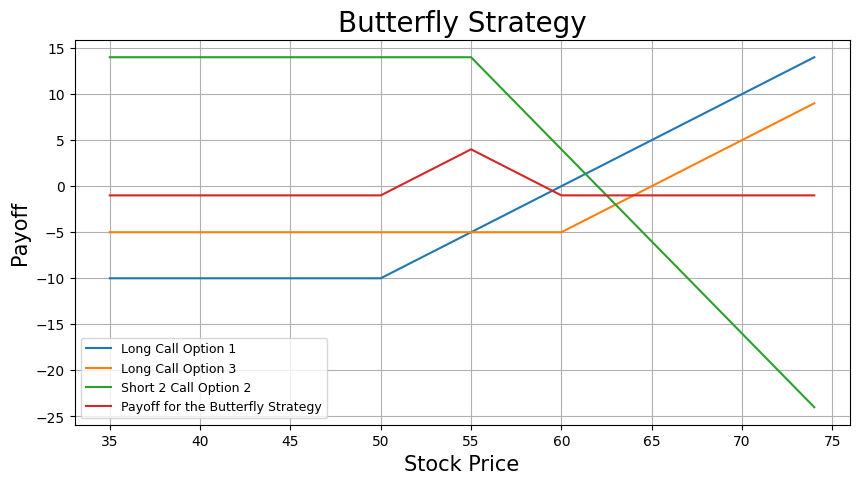

In [98]:
price = np.arange(35,75,1)
k_callopt1 = 50 # the strike price of call option 1
k_callopt2 = 55 # the strike price of call option 2
k_callopt3 = 60 # the strike price of call option 3
premium_callopt1 = 10 # the premium of call option 1
premium_callopt2 = 7 # the premium of call option 2
premium_callopt3 = 5 # the premium of call option 3

# payoff for the long call option 1 position
payoff_callopt1_long = [max(-premium_callopt1, i-k_callopt1-premium_callopt1) for i in price]

# payoff for the long call option 3 position
payoff_callopt3_long = [max(-premium_callopt3, i-k_callopt3-premium_callopt3) for i in price]

# payoff for the 2 short call option 2 position
payoff_callopt2_short = [min(2*premium_callopt2, -2*(i-k_callopt2-premium_callopt2)) for i in price]

# payoff for Butterfly Spread Strategy
payoff = np.sum([payoff_callopt1_long, payoff_callopt3_long, payoff_callopt2_short], axis=0)

plt.figure(figsize=(10,5))
plt.plot(price, payoff_callopt1_long, label = 'Long Call Option 1')
plt.plot(price, payoff_callopt3_long, label = 'Long Call Option 3')
plt.plot(price, payoff_callopt2_short, label = 'Short 2 Call Option 2')
plt.plot(price, payoff, label = 'Payoff for the Butterfly Strategy')
plt.legend(fontsize = 9)
plt.xlabel('Stock Price',fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Butterfly Strategy',fontsize = 20)
plt.grid(True)

### i) Why might an investor enter into such a strategy?
Butterfly strategy is a non-directional options strategy that combines both bull and bear spreads that have two short options at one strike and two long options of the opposite type at different strike positions. By utilizing the four options and three different strike prices, the risks are fixed with profits and losses capped. As the butterfly strategy is a neutral approach that profits from movements in either direction in the market, it can protect investors against investor bias and high volatility, especially for those risk-averse ones. 


## Question 4

The module 'yfinance' will be imported here to retrieve some stock datasets.

In [99]:
import pandas as pd
import numpy as np
import yfinance as yf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### (a) Calculate the daily returns of these stocks
(1) Daily return of HSBC

After installing relevant modules, we'll get the stock information of HSBC ('HSBC') downloaded from Yahoo Finance, using the ticker symbol, HSBC:

In [100]:
# Ticker name
tickers = 'HSBC'

# Read data
stock_data_HSBC = yf.download(tickers, start="2016-01-01", end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [101]:
# Ensure the data are sorted by Date
stock_data_HSBC = stock_data_HSBC.sort_values(by='Date')

# Show the first five rows of stock_data
stock_data_HSBC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,38.299999,38.610001,38.060001,38.590000,26.960804,3553100
2016-01-05 00:00:00-05:00,38.490002,38.610001,38.110001,38.500000,26.897923,1776500
2016-01-06 00:00:00-05:00,37.150002,37.330002,36.990002,37.169998,25.968719,2970400
2016-01-07 00:00:00-05:00,36.549999,36.869999,36.290001,36.389999,25.423780,3062900
2016-01-08 00:00:00-05:00,36.849998,36.860001,36.150002,36.150002,25.256111,3396200


The Adj Close (adjusted close price) column is one of the most important information as it is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. We will use the adjusted close price to calculate the returns of the stock.

In [102]:
# Get the adjusted close prices
stock_prices_HSBC = stock_data_HSBC['Adj Close']

# Show the adjusted close prices
stock_prices_HSBC.head()

# The data type of stock_prices
type(stock_prices_HSBC)

# Change the data type to Dataframe
stock_prices_HSBC = stock_prices_HSBC.to_frame()

# Display the result
stock_prices_HSBC
type(stock_prices_HSBC)

Date
2016-01-04 00:00:00-05:00    26.960804
2016-01-05 00:00:00-05:00    26.897923
2016-01-06 00:00:00-05:00    25.968719
2016-01-07 00:00:00-05:00    25.423780
2016-01-08 00:00:00-05:00    25.256111
Name: Adj Close, dtype: float64

pandas.core.series.Series

,Adj Close
Date,
2016-01-04 00:00:00-05:00,26.960804
2016-01-05 00:00:00-05:00,26.897923
2016-01-06 00:00:00-05:00,25.968719
2016-01-07 00:00:00-05:00,25.423780
2016-01-08 00:00:00-05:00,25.256111
...,...
2019-12-23 00:00:00-05:00,34.772968
2019-12-24 00:00:00-05:00,34.692265
2019-12-26 00:00:00-05:00,34.898495


pandas.core.frame.DataFrame

Note that we'll use the adjusted close prices to investiagte daily returns over time.

,Adj Close,Returns
Date,,
2016-01-04 00:00:00-05:00,26.960804,NaN
2016-01-05 00:00:00-05:00,26.897923,-0.002332
2016-01-06 00:00:00-05:00,25.968719,-0.034546
2016-01-07 00:00:00-05:00,25.423780,-0.020984
2016-01-08 00:00:00-05:00,25.256111,-0.006595


<AxesSubplot: xlabel='Date'>

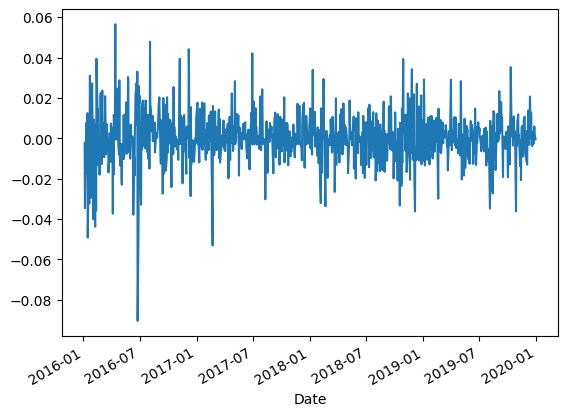

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the daily returns of the adjusted close price
stock_prices_HSBC['Returns'] = stock_prices_HSBC['Adj Close'].pct_change()

# Check the first five rows of stock prices
stock_prices_HSBC.head()

# Plot the returns column over time
stock_prices_HSBC['Returns'].plot()
plt.show()

(2) Daily return of JPM

Get the stock information of JPM ('JPM') from Yahoo Finance, using the ticker symbol, JPM:

In [104]:
# Ticker name
tickers = 'JPM'

# Read data
stock_data_JPM = yf.download(tickers, start="2016-01-01", end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [105]:
# Ensure the data are sorted by Date
stock_data_JPM = stock_data_JPM.sort_values(by='Date')

# Show the first five rows of stock_data
stock_data_JPM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,63.950001,64.059998,63.009998,63.619999,52.617458,25393200
2016-01-05 00:00:00-05:00,63.700001,64.129997,63.040001,63.730000,52.708431,16566700
2016-01-06 00:00:00-05:00,62.720001,63.130001,62.340000,62.810001,51.947548,22961500
2016-01-07 00:00:00-05:00,61.459999,62.000000,60.080002,60.270000,49.846817,27630900
2016-01-08 00:00:00-05:00,61.130001,61.270000,58.849998,58.919998,48.730286,22373300


In [106]:
# Get the adjusted close prices
stock_prices_JPM = stock_data_JPM['Adj Close']

# Show the adjusted close prices
stock_prices_JPM.head()

# The data type of stock_prices
type(stock_prices_JPM)

# Change the data type to Dataframe
stock_prices_JPM = stock_prices_JPM.to_frame()

# Display the result
stock_prices_JPM
type(stock_prices_JPM)

Date
2016-01-04 00:00:00-05:00    52.617458
2016-01-05 00:00:00-05:00    52.708431
2016-01-06 00:00:00-05:00    51.947548
2016-01-07 00:00:00-05:00    49.846817
2016-01-08 00:00:00-05:00    48.730286
Name: Adj Close, dtype: float64

pandas.core.series.Series

,Adj Close
Date,
2016-01-04 00:00:00-05:00,52.617458
2016-01-05 00:00:00-05:00,52.708431
2016-01-06 00:00:00-05:00,51.947548
2016-01-07 00:00:00-05:00,49.846817
2016-01-08 00:00:00-05:00,48.730286
...,...
2019-12-23 00:00:00-05:00,125.197350
2019-12-24 00:00:00-05:00,125.544098
2019-12-26 00:00:00-05:00,126.876373


pandas.core.frame.DataFrame

,Adj Close,Returns
Date,,
2016-01-04 00:00:00-05:00,52.617458,NaN
2016-01-05 00:00:00-05:00,52.708431,0.001729
2016-01-06 00:00:00-05:00,51.947548,-0.014436
2016-01-07 00:00:00-05:00,49.846817,-0.040439
2016-01-08 00:00:00-05:00,48.730286,-0.022399


<AxesSubplot: xlabel='Date'>

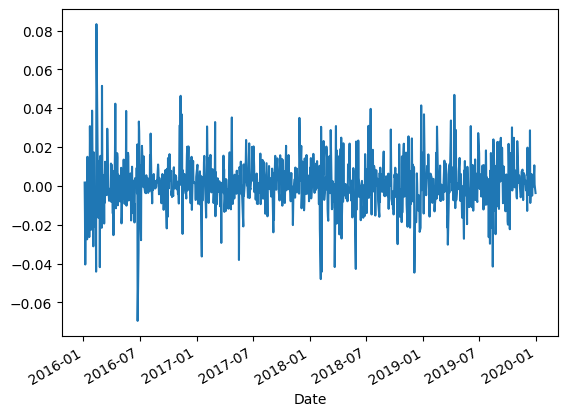

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the daily returns of the adjusted close price
stock_prices_JPM['Returns'] = stock_prices_JPM['Adj Close'].pct_change()

# Check the first five rows of stock prices
stock_prices_JPM.head()

# Plot the returns column over time
stock_prices_JPM['Returns'].plot()
plt.show()

(3) Daily return of GS

Get the stock information of GS ('GS') from Yahoo Finance, using the ticker symbol, GS:

In [108]:
# Ticker name
tickers = 'GS'

# Read data
stock_data_GS = yf.download(tickers, start="2016-01-01", end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [109]:
# Ensure the data are sorted by Date
stock_data_GS = stock_data_GS.sort_values(by='Date')

# Show the first five rows of stock_data
stock_data_GS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,175.789993,177.190002,173.759995,177.139999,155.659134,3745500
2016-01-05 00:00:00-05:00,176.710007,177.500000,172.919998,174.089996,152.978989,4521600
2016-01-06 00:00:00-05:00,171.309998,172.020004,169.100006,169.839996,149.244354,5539400
2016-01-07 00:00:00-05:00,166.669998,169.500000,163.600006,164.619995,144.657379,5687900
2016-01-08 00:00:00-05:00,166.750000,168.419998,163.630005,163.940002,144.059845,4929800


In [110]:
# Get the adjusted close prices
stock_prices_GS = stock_data_GS['Adj Close']

# Show the adjusted close prices
stock_prices_GS.head()

# The data type of stock_prices
type(stock_prices_GS)

# Change the data type to Dataframe
stock_prices_GS = stock_prices_GS.to_frame()

# Display the result
stock_prices_GS
type(stock_prices_GS)

Date
2016-01-04 00:00:00-05:00    155.659134
2016-01-05 00:00:00-05:00    152.978989
2016-01-06 00:00:00-05:00    149.244354
2016-01-07 00:00:00-05:00    144.657379
2016-01-08 00:00:00-05:00    144.059845
Name: Adj Close, dtype: float64

pandas.core.series.Series

,Adj Close
Date,
2016-01-04 00:00:00-05:00,155.659134
2016-01-05 00:00:00-05:00,152.978989
2016-01-06 00:00:00-05:00,149.244354
2016-01-07 00:00:00-05:00,144.657379
2016-01-08 00:00:00-05:00,144.059845
...,...
2019-12-23 00:00:00-05:00,214.191864
2019-12-24 00:00:00-05:00,214.958557
2019-12-26 00:00:00-05:00,216.174026


pandas.core.frame.DataFrame

,Adj Close,Returns
Date,,
2016-01-04 00:00:00-05:00,155.659134,NaN
2016-01-05 00:00:00-05:00,152.978989,-0.017218
2016-01-06 00:00:00-05:00,149.244354,-0.024413
2016-01-07 00:00:00-05:00,144.657379,-0.030735
2016-01-08 00:00:00-05:00,144.059845,-0.004131


<AxesSubplot: xlabel='Date'>

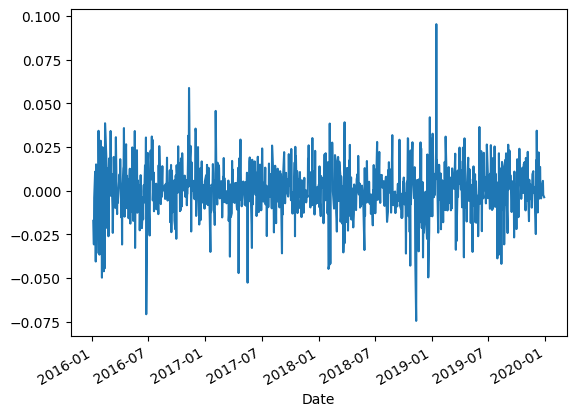

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the daily returns of the adjusted close price
stock_prices_GS['Returns'] = stock_prices_GS['Adj Close'].pct_change()

# Check the first five rows of stock prices
stock_prices_GS.head()

# Plot the returns column over time
stock_prices_GS['Returns'].plot()
plt.show()

(4) Daily return of C

Get the stock information of C ('C') from Yahoo Finance, using the ticker symbol, C:

In [112]:
# Ticker name
tickers = 'C'

# Read data
stock_data_C = yf.download(tickers, start="2016-01-01", end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [113]:
# Ensure the data are sorted by Date
stock_data_C = stock_data_C.sort_values(by='Date')

# Show the first five rows of stock_data
stock_data_C.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,50.750000,51.189999,50.189999,51.130001,42.594547,23440200
2016-01-05 00:00:00-05:00,51.540001,51.610001,50.410000,50.860001,42.369625,17444900
2016-01-06 00:00:00-05:00,50.099998,50.580002,49.759998,50.119999,41.753151,22501800
2016-01-07 00:00:00-05:00,49.070000,49.380001,47.500000,47.560001,39.620514,37902900
2016-01-08 00:00:00-05:00,48.730000,48.740002,46.029999,46.130001,38.429230,30643000


In [114]:
# Get the adjusted close prices
stock_prices_C = stock_data_C['Adj Close']

# Show the adjusted close prices
stock_prices_C.head()

# The data type of stock_prices
type(stock_prices_C)

# Change the data type to Dataframe
stock_prices_C = stock_prices_C.to_frame()

# Display the result
stock_prices_C
type(stock_prices_C)

Date
2016-01-04 00:00:00-05:00    42.594547
2016-01-05 00:00:00-05:00    42.369625
2016-01-06 00:00:00-05:00    41.753151
2016-01-07 00:00:00-05:00    39.620514
2016-01-08 00:00:00-05:00    38.429230
Name: Adj Close, dtype: float64

pandas.core.series.Series

,Adj Close
Date,
2016-01-04 00:00:00-05:00,42.594547
2016-01-05 00:00:00-05:00,42.369625
2016-01-06 00:00:00-05:00,41.753151
2016-01-07 00:00:00-05:00,39.620514
2016-01-08 00:00:00-05:00,38.429230
...,...
2019-12-23 00:00:00-05:00,70.622826
2019-12-24 00:00:00-05:00,70.470375
2019-12-26 00:00:00-05:00,71.582275


pandas.core.frame.DataFrame

,Adj Close,Returns
Date,,
2016-01-04 00:00:00-05:00,42.594547,NaN
2016-01-05 00:00:00-05:00,42.369625,-0.005281
2016-01-06 00:00:00-05:00,41.753151,-0.014550
2016-01-07 00:00:00-05:00,39.620514,-0.051077
2016-01-08 00:00:00-05:00,38.429230,-0.030067


<AxesSubplot: xlabel='Date'>

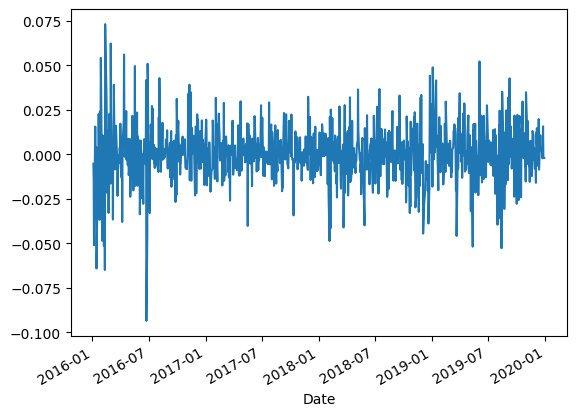

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the daily returns of the adjusted close price
stock_prices_C['Returns'] = stock_prices_C['Adj Close'].pct_change()

# Check the first five rows of stock prices
stock_prices_C.head()

# Plot the returns column over time
stock_prices_C['Returns'].plot()
plt.show()

### (b) The covariance matrix of these stocks

In [116]:
stock_concat = pd.concat([stock_prices_HSBC['Returns'],stock_prices_JPM['Returns'],
                          stock_prices_GS['Returns'],stock_prices_C['Returns'],],axis=1)
stock_concat.columns = ['HSBC','JPM','GS','C']

In [117]:
stock_concat

,HSBC,JPM,GS,C
Date,,,,
2016-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00-05:00,-0.002332,0.001729,-0.017218,-0.005281
2016-01-06 00:00:00-05:00,-0.034546,-0.014436,-0.024413,-0.014550
2016-01-07 00:00:00-05:00,-0.020984,-0.040439,-0.030735,-0.051077
2016-01-08 00:00:00-05:00,-0.006595,-0.022399,-0.004131,-0.030067
...,...,...,...,...
2019-12-23 00:00:00-05:00,-0.002828,-0.000292,0.000699,0.003184
2019-12-24 00:00:00-05:00,-0.002321,0.002770,0.003579,-0.002159
2019-12-26 00:00:00-05:00,0.005945,0.010612,0.005654,0.015778


In [118]:
stock_concat.cov()

,HSBC,JPM,GS,C
HSBC,0.000146,0.000098,0.000109,0.000126
JPM,0.000098,0.000169,0.000162,0.000180
GS,0.000109,0.000162,0.000232,0.000193
C,0.000126,0.000180,0.000193,0.000248


In [119]:
port_cov = stock_concat.cov()
port_cov

,HSBC,JPM,GS,C
HSBC,0.000146,0.000098,0.000109,0.000126
JPM,0.000098,0.000169,0.000162,0.000180
GS,0.000109,0.000162,0.000232,0.000193
C,0.000126,0.000180,0.000193,0.000248


### (c) Suppose that the four stocks are equally weighted, find the annualised portfolio expected returns and portfolio variance

See below calculation of daily returns of 4 stocks in the portfolio:

In [120]:
# Check the first five rows
stock_returns_port = stock_concat
stock_returns_port.head()

# Check the shape of stock_concat
stock_returns_port.shape

,HSBC,JPM,GS,C
Date,,,,
2016-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00-05:00,-0.002332,0.001729,-0.017218,-0.005281
2016-01-06 00:00:00-05:00,-0.034546,-0.014436,-0.024413,-0.014550
2016-01-07 00:00:00-05:00,-0.020984,-0.040439,-0.030735,-0.051077
2016-01-08 00:00:00-05:00,-0.006595,-0.022399,-0.004131,-0.030067


(1005, 4)

Next, we define the weights for each stock and calculate the corresponding (daily) portfolio returns

,HSBC,JPM,GS,C
Date,,,,
2016-01-05 00:00:00-05:00,-0.000583,0.000432,-0.004305,-0.001320
2016-01-06 00:00:00-05:00,-0.008636,-0.003609,-0.006103,-0.003637
2016-01-07 00:00:00-05:00,-0.005246,-0.010110,-0.007684,-0.012769
2016-01-08 00:00:00-05:00,-0.001649,-0.005600,-0.001033,-0.007517
2016-01-11 00:00:00-05:00,0.001936,-0.000382,0.002730,0.003902


,HSBC,JPM,GS,C,Portfolio
Date,,,,,
2016-01-05 00:00:00-05:00,-0.002332,0.001729,-0.017218,-0.005281,-0.005775
2016-01-06 00:00:00-05:00,-0.034546,-0.014436,-0.024413,-0.014550,-0.021986
2016-01-07 00:00:00-05:00,-0.020984,-0.040439,-0.030735,-0.051077,-0.035809
2016-01-08 00:00:00-05:00,-0.006595,-0.022399,-0.004131,-0.030067,-0.015798
2016-01-11 00:00:00-05:00,0.007745,-0.001527,0.010919,0.015608,0.008186
...,...,...,...,...,...
2019-12-23 00:00:00-05:00,-0.002828,-0.000292,0.000699,0.003184,0.000191
2019-12-24 00:00:00-05:00,-0.002321,0.002770,0.003579,-0.002159,0.000467
2019-12-26 00:00:00-05:00,0.005945,0.010612,0.005654,0.015778,0.009497


<AxesSubplot: xlabel='Date'>

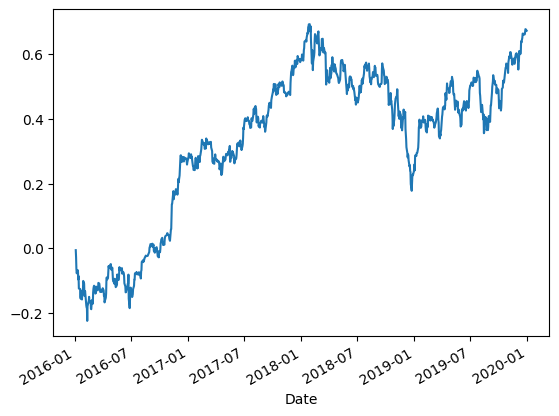

In [121]:
# Define the portfolio weights as a numpy array
portfolio_weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calculate the weighted stock returns
weighted_returns = stock_returns_port.mul(portfolio_weights, axis=1).dropna()
weighted_returns.head()

# Calculate the daily portfolio returns
stock_returns_port['Portfolio'] = weighted_returns.sum(axis=1)
stock_returns_port.dropna()

# Plot the cumulative portfolio returns over time
cumulative_returns_port = ((1 + stock_returns_port['Portfolio']).cumprod() - 1)
cumulative_returns_port.plot()
plt.show()

Then, the Annualized portfolio expected return with total returns is estmated as follows:

In [122]:
# Find N
N = stock_returns_port['Portfolio'].dropna().count()

# The (1 + Return) component
return_comp = (1 + stock_returns_port['Portfolio'].dropna()).prod()

# Annualized return
annualized_expected_return = return_comp ** (252 / N) - 1
print('The annualized portfolio expected return is ', annualized_expected_return)

The annualized portfolio expected return is  0.13768467475452506


Calculation of the annualized variance:

In [123]:
# Calculate the standard deviation of daily return of the portfolio
sigma_daily = np.std(stock_returns_port['Portfolio'].dropna())
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily ** 2
print(variance_daily)

0.012565218219224464
0.00015788470889673041


In [124]:
# Annualize the standard deviation
sigma_annualized = sigma_daily * np.sqrt(250)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized ** 2
print('The annualised portfolio variance is ', variance_annualized)

0.19867354434897114
The annualised portfolio variance is  0.0394711772241826


According to the calculations above, we can see that there is an annualized volatility (σ) of 19.87% per year and an annualized variance of 3.95% per year.

### (d) Find the efficient portfolio with the maximum sharp ratio

In [125]:
pip install pyportfolioopt

Note: you may need to restart the kernel to use updated packages.


In [126]:
# import the relevant modules
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

The following code are used to calculate the expected returns mu and the covariance matrix S for our chosen stocks in the portfolio.

In [127]:
# Ticker name
tickers_all = ['HSBC', 'JPM', 'GS', 'C']

# Read data with the yfinance module
stock_data_all = yf.download(tickers_all, start="2016-01-01", end="2019-12-31")

# Ensure the data are sorted by Date
stock_data_all = stock_data_all.sort_values(by='Date')

# Get the adjusted close prices
stock_prices_all = stock_data_all['Adj Close']

# Show the adjusted close prices
stock_prices_all.head()

# The data type of stock_prices
type(stock_prices_all)

[*********************100%***********************]  4 of 4 completed


,C,GS,HSBC,JPM
Date,,,,
2016-01-04 00:00:00-05:00,42.594555,155.659119,26.960806,52.617458
2016-01-05 00:00:00-05:00,42.369637,152.978989,26.897926,52.708427
2016-01-06 00:00:00-05:00,41.753162,149.244370,25.968723,51.947540
2016-01-07 00:00:00-05:00,39.620514,144.657349,25.423782,49.846817
2016-01-08 00:00:00-05:00,38.429245,144.059799,25.256104,48.730289


pandas.core.frame.DataFrame

In [128]:
mean = stock_prices_all.resample('Y').last().pct_change().mean()
mean

C       0.185367
GS      0.048695
HSBC    0.070468
JPM     0.221929
dtype: float64

In [129]:
# Calculate the covariance matrix sigma
sigma = risk_models.sample_cov(stock_prices_all)
sigma

,C,GS,HSBC,JPM
C,0.062538,0.048628,0.031657,0.045358
GS,0.048628,0.058378,0.027343,0.040793
HSBC,0.031657,0.027343,0.036790,0.024670
JPM,0.045358,0.040793,0.024670,0.042621


In [130]:
# Obtain the efficient frontier
ef_sharpe = EfficientFrontier(mean, sigma)

In [131]:
# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef_sharpe.max_sharpe()
cleaned_weights_maxsharpe = ef_sharpe.clean_weights()
cleaned_weights_maxsharpe

OrderedDict([('C', 0.0), ('GS', 0.0), ('HSBC', 0.0), ('JPM', 1.0)])

Investing all in JPM stock will result in the efficient portfolio with the maximum Sharpe ratio.

Then, we can obtain the performance of the above portfolio using the following formula:

In [132]:
ef_sharpe.portfolio_performance(verbose=True)

Expected annual return: 22.2%
Annual volatility: 20.6%
Sharpe Ratio: 0.98


(0.2219297960138298, 0.20644905941926953, 0.9781095471291943)

The corresponding Sharpe ratio is 0.98.

### (e) Plot the efficient frontier

In [133]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
# Import data
df = data.DataReader(['HSBC', 'JPM', 'GS', 'C'], 'yahoo', start='2016/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                        Close             \
Symbols          HSBC        JPM          GS          C       HSBC        JPM   
Date                                                                            
2016-01-04  26.960806  52.617455  155.659149  42.594559  38.590000  63.619999   
2016-01-05  26.897930  52.708435  152.979004  42.369621  38.500000  63.730000   
2016-01-06  25.968716  51.947544  149.244400  41.753162  37.169998  62.810001   
2016-01-07  25.423777  49.846821  144.657318  39.620514  36.389999  60.270000   
2016-01-08  25.256104  48.730286  144.059784  38.429245  36.150002  58.919998   

Attributes                              High             ...         Low  \
Symbols             GS          C       HSBC        JPM  ...          GS   
Date                                                     ...               
2016-01-04  177.139999  51.130001  38.610001  64.059998  ...  173.759995   
2016-01-05  174.089996  50.860001  38.610001  64.129997  ...  172.919998   
2016-01-06  169.839996  50.119999  37.330002  63.130001  ...  169.100006   
2016-01-07  164.619995  47.560001  36.869999  62.000000  ...  163.600006   
2016-01-08  163.940002  46.130001  36.860001  61.270000  ...  163.630005   

Attributes                  Open                                       Volume  \
Symbols             C       HSBC        JPM          GS          C       HSBC   
Date                                                                            
2016-01-04  50.189999  38.299999  63.950001  175.789993  50.750000  3553100.0   
2016-01-05  50.410000  38.490002  63.700001  176.710007  51.540001  1776500.0   
2016-01-06  49.759998  37.150002  62.720001  171.309998  50.099998  2970400.0   
2016-01-07  47.500000  36.549999  61.459999  166.669998  49.070000  3062900.0   
2016-01-08  46.029999  36.849998  61.130001  166.750000  48.730000  3396200.0   

Attributes                                     
Symbols            JPM         GS           C  
Date                                           
2016-01-04  25393200.0  3745500.0  23440200.0  
2016-01-05  16566700.0  4521600.0  17444900.0  
2016-01-06  22961500.0  5539400.0  22501800.0  
2016-01-07  27630900.0  5687900.0  37902900.0  
2016-01-08  22373300.0  4929800.0  30643000.0  

[5 rows x 24 columns]

In [135]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,HSBC,JPM,GS,C
Date,,,,
2016-01-04,26.960806,52.617455,155.659149,42.594559
2016-01-05,26.897930,52.708435,152.979004,42.369621
2016-01-06,25.968716,51.947544,149.244400,41.753162
2016-01-07,25.423777,49.846821,144.657318,39.620514
2016-01-08,25.256104,48.730286,144.059784,38.429245


In [136]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,HSBC,JPM,GS,C
Symbols,,,,
HSBC,0.000147,0.000098,0.000109,0.000127
JPM,0.000098,0.000169,0.000162,0.000180
GS,0.000109,0.000162,0.000232,0.000194
C,0.000127,0.000180,0.000194,0.000249


In [137]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
HSBC    0.071419
JPM     0.224640
GS      0.048959
C       0.187869
dtype: float64

In [138]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
HSBC    0.191524
JPM     0.205281
GS      0.240861
C       0.249425
dtype: float64

In [139]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
HSBC,0.071419,0.191524
JPM,0.224640,0.205281
GS,0.048959,0.240861
C,0.187869,0.249425


In [140]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [141]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [142]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [143]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,HSBC weight,JPM weight,GS weight,C weight
0,0.163355,0.198147,0.147303,0.535198,0.194660,0.122838
1,0.142578,0.189473,0.308452,0.406079,0.174964,0.110505
2,0.101851,0.191780,0.471873,0.070769,0.242394,0.214964
3,0.132629,0.198192,0.275750,0.230464,0.227507,0.266278
4,0.126687,0.204269,0.241761,0.144552,0.276039,0.337648


<AxesSubplot: xlabel='Volatility', ylabel='Returns'>

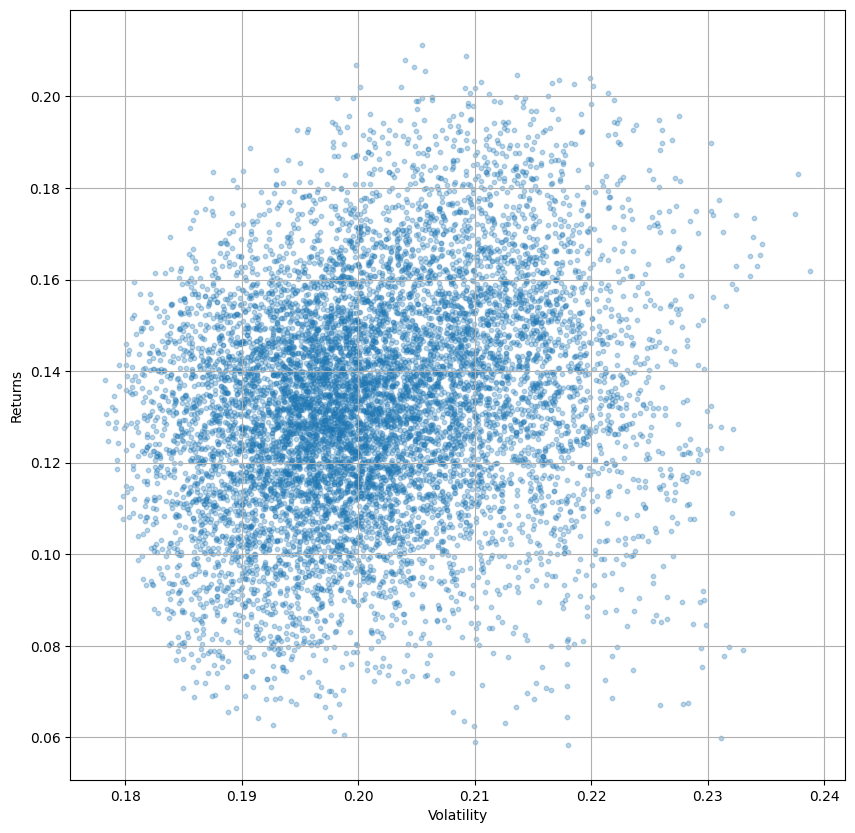

In [144]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [145]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.138120
Volatility     0.178278
HSBC weight    0.560140
JPM weight     0.434756
GS weight      0.003649
C weight       0.001455
Name: 5796, dtype: float64

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

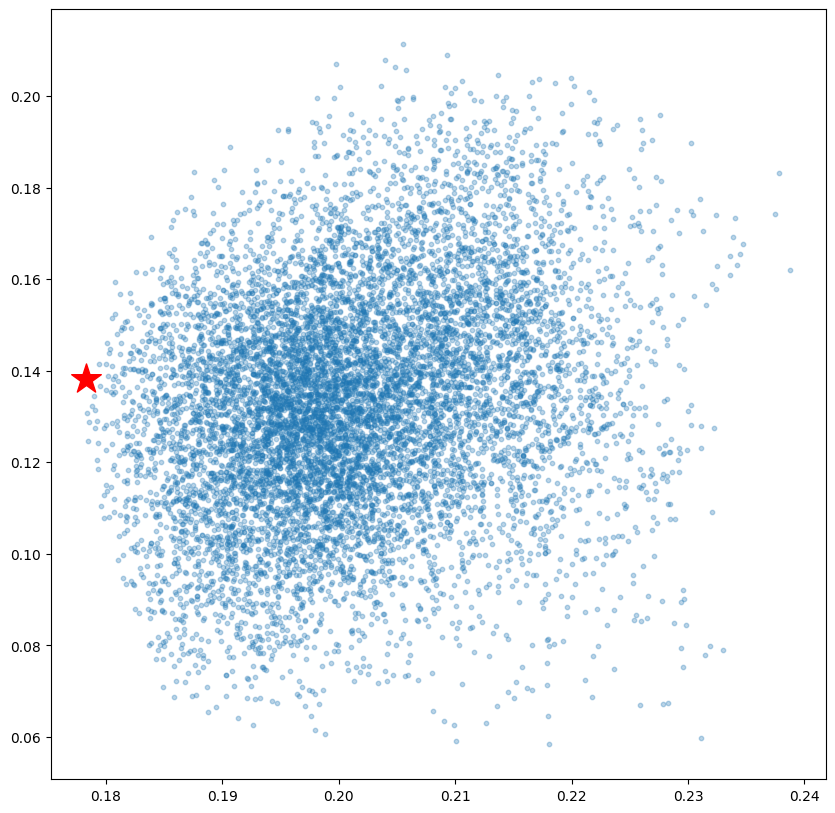

In [146]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [147]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.206915
Volatility     0.199796
HSBC weight    0.065242
JPM weight     0.887626
GS weight      0.043159
C weight       0.003973
Name: 734, dtype: float64

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

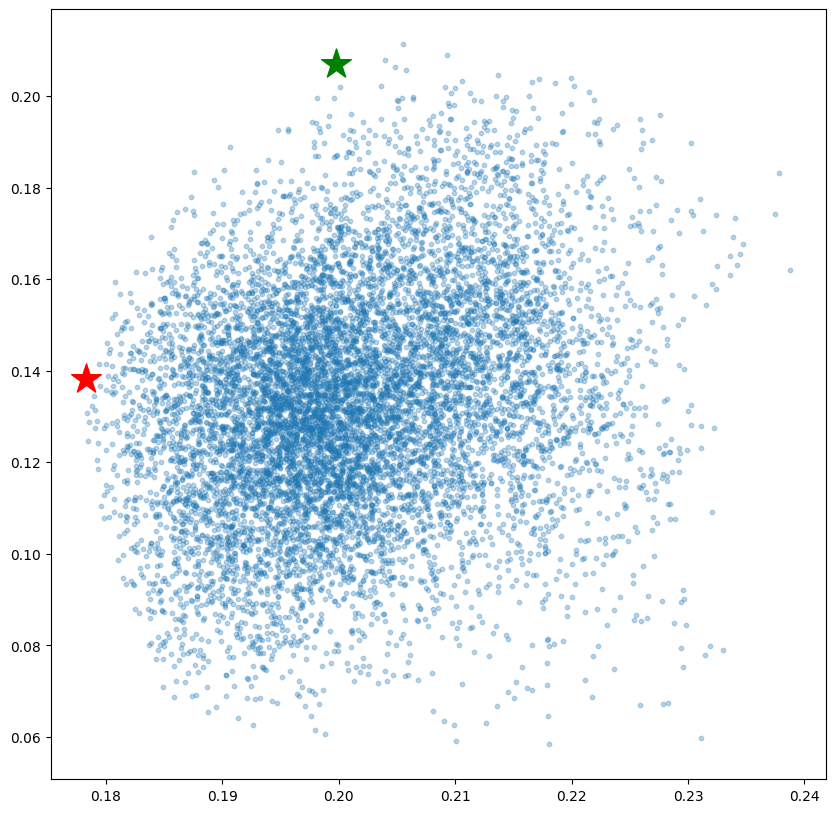

In [148]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

### (f) Based on the concept of diversification, comment on the current portfolio. How can this portfolio be improved?

The most essential principle in the Diversification Strategy is to reduce total risks by spreading investments across various types of assets with different risk levels. Our current portfolio’s focus on the financial industry will lead to high diversifiable risk. 

To eliminate the unsystematic risk, we could adopt the following diversification strategies:

- **Diversification Across Assets**: in addition to stock, other types of assets with different risks and returns like bonds, exchange-traded funds (ETFs), commodities, and cash equivalent financial products can be added to the portfolio.

- **Diversification Across Industries**: different sectors operate in tremendously different ways and investing in varieties of industries can eliminate the sector-specific risk that financial companies faced.

- **Diversification Across Borders**: political, geopolitical, economic, and domestic risks can be vastly reduced by diversifying into foreign markets. 

- **Diversification Across Maturity**: for bonds, normally, the longer the maturity lengths are, the higher price fluctuations due to changes in interest rates. Therefore, it is a good choice to diversify investments by adding both long-term and short-term bonds to the portfolio.

In short, with appropriate diversification, our portfolio will be protected from shocks brought by the financial industry.

[Count: 189 words]

## Question 5

In [26]:
data = pd.read_excel('2015-vbt-unismoke-alb-anb.xlsx', sheet_name='2015 Female Unismoke ANB', header=2)
data.head()

,Iss. Age,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,Ult.,Att. Age
0,0,0.25,0.14,0.09,0.07,0.06,0.07,0.08,0.07,0.07,...,0.26,0.27,0.27,0.27,0.28,0.30,0.34,0.36,0.36,25
1,1,0.14,0.09,0.07,0.06,0.07,0.08,0.07,0.07,0.07,...,0.27,0.27,0.27,0.28,0.30,0.34,0.36,0.36,0.35,26
2,2,0.09,0.07,0.06,0.07,0.08,0.07,0.07,0.07,0.07,...,0.27,0.27,0.28,0.30,0.34,0.36,0.36,0.35,0.34,27
3,3,0.07,0.06,0.07,0.08,0.07,0.07,0.07,0.07,0.08,...,0.27,0.28,0.30,0.34,0.36,0.36,0.35,0.34,0.35,28
4,4,0.06,0.07,0.08,0.07,0.07,0.07,0.07,0.08,0.07,...,0.28,0.30,0.34,0.36,0.36,0.35,0.34,0.35,0.37,29


### a) Calculate Pam’s annual unconditional survival rates $nP_{x}$ from now to age 54.

In [27]:
#obtain the mortality rates (n−1|q44) before the attained age
df = data.loc[data["Iss. Age"] == 44] / 1000
df = df.rename(columns={"Iss. Age": 0})
df = df.drop(["Att. Age"], axis=1)
df[0] = 0

#obtain 1-(n−1|q44)
df_1 = 1 - df

#obtain the annual unconditional survival rates (np44)
np44 = [1]
for r in df_1.values[0][1:]:
    np44.append(r*np44[-1])

print("Pam’s annal unconditional survival rates from 42 to now are:")
for i in range(11):
    print(f'age {44+i}:', '{0:.2%}'.format(np44[i]))

Pam’s annal unconditional survival rates from 42 to now are:
age 44: 100.00%
age 45: 99.98%
age 46: 99.94%
age 47: 99.89%
age 48: 99.82%
age 49: 99.73%
age 50: 99.63%
age 51: 99.52%
age 52: 99.39%
age 53: 99.24%
age 54: 99.06%


### b) Calculate Pam’s life expectancy in years (show one decimal place).

In [28]:
#obtain the mortality rates (n−1|q44) before the attained age
df_2 = data.loc[data["Iss. Age"] == 44] / 1000
df_2 = df_2.rename(columns={"Iss. Age": 0})
df_2 = df_2.drop(["Att. Age"], axis=1)
df_2[0] = 0

#obtain 1-(n−1|q44) before the attained age
df_3 = 1 - df_2

#obtain the annual unconditional survival rates (np44) before the attained age
np44 = [1]
for r in df_3.values[0][1:]:
    np44.append(r*np44[-1])
    
#obtain the mortality rates (n−1|q44) beyond the attained age
df_4 = data["Ult."].loc[data["Iss. Age"] > 44] / 1000

#obtain the annual unconditional survival rates (np44) beyond the attained age
for r in df_4.values:
    np44.append((1-r)*np44[-1])

#compute the life expectancy in years
LE = sum(np44) - 0.5
print('Pam’s life expectancy in years is', '{0:.1f}'.format(LE))

Pam’s life expectancy in years is 41.6


### c) Calculate the probability that Pam dies exactly between 8 and 12 years from now (show five decimal places).

In [29]:
p = 0

#sum P9 + P10 + P11 + P12
for i in range(9, 13):
    p += float(np44[i-1] * df_2[i])
    
print("The probability that Pam dies exactly between 8 and 12 years from now is", '{0:.5%}'.format(p))

The probability that Pam dies exactly between 8 and 12 years from now is 0.73541%


### d) Calculate the minimum annual premium rate (premium as a fraction of death benefit) that Pam and the cohort she is part of should be charged (show five decimal places).

In [30]:
#obtain the list of mortality rates (n−1|q44)
mr = np.append(df_2.values[0][:], df_4.values)

#compute the list of (1+r)^n where r=5.1%
r = 5.1/100
rlist = []
for i in range(len(mr)):
    rlist.append((1+r)**i)
rlist = np.array(rlist)

#compute the list of Pn
Pn = [0]
for i in range(1, len(mr)):
    Pn.append(np44[i-1] * mr[i])
Pn = np.array(Pn)

npr = np.array(np44)/rlist
pnr = Pn/rlist

#compute the annual premium rate
rate = pnr.sum()/npr.sum()
print("The minimum annual premium rate that should charge for Pam’s cohort is",'{0:.5%}'.format(rate))

The minimum annual premium rate that should charge for Pam’s cohort is 0.82304%


### e) In actual fact, Pam’s quoted premiums better (cheaper) are than your calculations, what technologies could Pam’s provider be using to both reduce premiums and continue to make a profit, and how is this achieved?

Personalized Insurance Pricing using Big Data

While the old-fashioned type of risk assessment relies on impersonalized datasets (e.g. 2015 VBT Unismoke ANB/ALB dataset), insurance companies can acquire a large amount of personal data through nowadays IoT devices and social media and make more accurate risk assessments with the application of machine learning.

For example, wearable devices can provide deep insights into customers' physical condition (e.g. blood pressure). By collecting these data, Pam's provider can train a machine learning model that accurately predicts the risk level of a customer based on his/her physical condition. Then, the model can be applied to Pam and the provder will be able to personalize Pam's premium based on the result given by model. Moreover, this type of data is available in real time which continuously providing valuable information for the provider. 

By adopting such method, the provider can personalize a lower premium for Pam (given that she is in good condition) while accurately identify customers that are more risky (so to apply a higher premium to make a profit).

[Count: 179 words]

## Qustion 6

### a) Describe the emerging technologies which could be utilised for this project within the mobile wallet business, and how they can be a profitable business venture.

**Blockchain technology** has the potential to optimize the way mobile wallet businesses handle payment processing in general. It is a critical example of **distributed ledgers technology** (DLT) which is known for its decentralized peer-to-peer electronic payment system. Such technology maintains secure records of transactions since it is based on cryptographic proof, prevents double-spending problems by adopting proof-of-work, and transforms transactions so that they are computationally immutable. Along with its powerful features, the adoption of blockchain technology is considered a profitable business venture partly because it is relatively cheaper to update transactions electronically than conventional payment systems.

**Artificial intelligence** (AI) technology is capable of making decisions automatically and performing sophisticated predictions by accessing and processing enormous volumes of data. It facilitates general productivity and strengthens the profitability of the business venture. **Machine learning** (ML) is one classic application of AI-driven methodologies. ML algorithms can rapidly monitor real-time transaction data and utilize them to produce statistical models, which further helps businesses make faster responses to unusual cases. Therefore, mobile payment businesses can timely detect fraud and money laundering, and efficiently prevent the occurrence of customer data leakage from transactions by integrating AI and ML capabilities into digital wallets. 

**Robotic process automation** (RPA) is a software-based technology that utilizes software robots to emulate human behaviors and take over labor-intensive tasks. Using RPA in conjunction with AI technologies such as ML and other process analytics offers a wide range of uses such as gathering vendor data, authenticating and processing payments with a quick response time. Such applications make an automated business possible and sound. Moreover, with RPA doing repetitively routine work, the human workforce can accomplish more in less time with fewer resources. As a result, the costs are reduced since the efficiency increases while employing fewer workers and the need for physical plants decreases. 

**Cloud computing** is the core of digital wallet applications as it grants quick access to technology services including storage, databases, and software over the Internet on an as-needed basis. Cloud’s inbuilt features solve the data security issue for digital wallets by automatically encrypting customers’ personal information within the application and securely storing them in a remote virtual repository. Furthermore, it facilitates contactless payments via mobiles, directly improving consumer convenience. It also enables the deployment of AI- and blockchain-based applications in minutes, which both enhance the existing features of the mobile wallet.

[Count: 392 words]


### b) Analyse an exist disruptive digital finance company or project [Not covered in lectures], noting their business model, means of revenue generation as well as current main client scope. Discuss how they can expand their business lines to broaden means of revenue generation, noting any synergies and complementary effects to their existing business model if any.

Monzo offers various financial products and is one the biggest neobanks in the UK with more than 5 million customers. Opposite to traditional banks, Monzo doesn't operate any physical branches but delivers all its banking services online through the mobile app.

There are several revenue streams in Monzo, ranging from charging for overdrafts to monthly subscription fees for its business accounts. With enormous features and functions provided by Monzo’s mobile app, it provides the below business:

1.	**Personal Accounts**:
There are different types of personal accounts that Monzo provides to fulfill different customer needs, namely Individual Accounts, Joint Accounts, and Accounts for 16-17 years old. Individual accounts are further divided into original current accounts, Monzo Plus, and Monzo Premium, which offer different levels of service and charge different levels of fees. Joint accounts enable couples and partners to bring their money together and manage their shared pool easier. In addition, Monzo renders innovative services for teenagers and blocks some age restrictions. Also, it is worth noting that customers' deposits are protected by The Financial Services Compensation Scheme (FSCS) up to £85,000 per person. 


2.	**Business Accounts**:
On the corporate banking side, Monzo helps small to medium companies stay on top of their finances. Starting at no monthly fees for lite accounts and £5 subscription fee per month for the Pro version.


3.	**Saving Accounts**:
Different from the current account, Monzo has the savings service that is fixed for at least 12 months with a £500 minimum. Similar to traditional banks, Monzo will finance deposits from savings accounts and lend money to other individuals or corporations to make money through loan interests.


4.	**Overdrafts**:
Overdraft is designed for short-term borrowing and for customers who want a little extra money on hand.
Customers can simply check their eligibility and the overdraft costs in the Monzo app. The borrowing rate charged to customers depends on their credit scores and the cost will be lower if they pay back quickly.


5.	**Loans**:
Loans refer to the long-term higher amount of borrowings. Monzo enables customization on repayment dates and flexibility in repaying earlier without additional fees charged.


6.	**Monzo Flex**:
Monzo Flex as a revolution to conventional credit cards provides customers with instant credits for purchasing, which is interest-free for 3 installments and at 24% for 6 and 12 installments.


Among the above business lines and revenue streams, interest income from borrowings and commission incomes from banking services account for 34% and 65% of the total income respectively, according to Monzo’s 2021 annual report.

As a strategic plan in the coming years, Monzo should utilize its **synergies** on the mobile app and keep upgrading the app and developing new functions. Specifically, new budgeting tools, developer tools, and account aggregation in the app, as well as pay from the pot for repeating card bills, these new features will assist Monzo to achieve long-term sustainable growth.

Last but not least, Monzo can expand its business lines by enlarging its strength in strong machine learning power and the well-developed AI platform. A new vision on **virtual wealth management** should be added by Monzo, just like how traditional banks are growing. Monzo can first digitize the application and processing of insurance products and enter the **virtual insurance** market. Then, in cooperation with third-party fund managers, the **investment services** module can be embedded in Monzo’s app to enable customers to select from types of funds, ranging from money-market funds to bonds, balanced funds, and equity thematic funds. These will help Monzo not only lead in the virtual-bank industry, but also in the whole banking sector.

[Count: 598 words]


### c) From part a), select the most apt emerging technology for this new project, clearly stating the how it can complement both PayC, the mobile wallet business and one other business under Stunaep mentioned in this case study. 

Among the emerging technologies discussed in part a), **Robotic Process Automation (“RPA”)** is the most appropriate one to be applied by PayC and Stunaep to automate its internal repetitive processes and routine tasks.

There are several aspects of the **mobile wallet business** which RPA can be applied to:

1.	**Customer service** – Mobile wallet business involves enormous volumes of common client queries that can be quickly responded to by applying automation to reduce the turnaround times and optimize internal workflow. Additionally, using RPA enhances its interactions with customers and enables PayC to be available 24 hours every day, thus, delivering incomparable virtual services. 

2.	**Fraud detection** – The security of digital wallets is a primary focus for PayC to take effective measures. RPA utilizes algorithms to thoroughly identify fraudulent patterns, flag suspicious transactions, and freeze relevant accounts. As a result, fraud cases can be detected at an early stage and prevented from further illegal activities.

3.	**KYC and AML/CFT** – Know Your Customer, Anti-Money Laundering, and Counter-Terrorist Financing have always been a crucial part of e-wallet operations which involve substantial manual steps, and therefore makes RPA an optimal solution. For example, the customer screening process can be automated by accessing the database, extracting data from documents, emerging data from different platforms, and filling in KYC check forms.

For the **investment operations line**, deploying RPA can assist with the below processes:

1.	**Manual reconciliation** – Implementing rule-based automation can substitute for reconciliation work, more specifically, verifying investment payments made and reconciling the payment records against the investment amount. As reconciliations on investments need to be performed on a transaction basis and are especially important for Stunaep, who has huge investment-size businesses, RPA under this circumstance can achieve cost reduction and improve productivity.

2.	**Investment reporting and analysis** – Each investment decision requires large efforts on documentation to evaluate individual financial products, industry sectors, economic trends, etc. RPA can be used to develop templates for Financial Analysis Reports and consolidate data from both internal and external systems, hence, providing higher-quality work free from manual errors and achieving operational efficacy.

Moreover, the back office as the basis for a company to operate smoothly plays an essential role in the Stunaep Group and benefits more than the mobile wallets and investment operations these two business lines. RPA helps with the following areas of **back-office automation**:

1.	**Financial report generation** – Financial reporting is essential for each type of business and RPA can be used to automatically gather data from accounting systems and create reports, e.g., general ledger post reports, quarterly financial statements, and balance sheets, to eliminate human errors and fulfill regulatory requirements. 

2.	**Email automation** – RPA enables the program to make cognitive decisions by reading and classifying emails with predefined commands. In this way, employees can concentrate on most matters part with less time spent on filtering emails with greater work efficiency. 

To adopt the above-mentioned RPA solutions, PayC and Stunaep can choose to either buy off-the-shelf packages, like Aiwozo, UiPath, Kofax, and Automation Anywhere, or develop their own custom RPA software. In this case, creating custom software internally would require a huge IT team with experts in RPA development and will definitely heaven their expenditure burden. Finding a third-party development provider can also be costly as PayC and Stunaep have fewer unique needs for automation. As such, purchasing pre-built automation software is the most adequate choice for PayC and Stunaep to fulfill their general automation functionalities, diminish repetitive manual tasks, optimize the usage of human resources, and achieve higher profitability.

[Count: 582 words]